<a id='back_to_top'></a>
**COOP C292 Group Project**

**Authors:** Ma Ana Victoria Nieva, Sarah D. Lipoff, Sory Sall, Alana Crumbley<br>

**Date:** April 15, 2023<br>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
mxmh = pd.read_csv('/Users/sarahlipoff/Downloads/mxmh_survey_results.csv')

In [3]:
mxmh.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [4]:
mxmh.shape

(736, 33)

In [5]:
#Look at data types
mxmh.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [6]:
#Drop some from list
mxmh.drop(columns=['Timestamp','Primary streaming service', 'Instrumentalist', 'Composer', 'While working', 'Exploratory', 'Foreign languages', 'BPM', 'Permissions'], inplace=True)

In [7]:
mxmh.dtypes

Age                             float64
Hours per day                   float64
Fav genre                        object
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object
Frequency [Rock]                 object
Frequency [Video game music]     object
Anxiety                         float64
Depression                      float64
Insomnia                        float64
OCD                             float64
Music effects                    object
dtype: object

In [8]:
#Look at head again
mxmh.head()

,Age,Hours per day,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,3.0,Latin,Rarely,Never,Rarely,Never,Never,Sometimes,Never,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,1.5,Rock,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,4.0,Video game music,Never,Never,Very frequently,Never,Never,Rarely,Rarely,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,2.5,Jazz,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,4.0,R&B,Never,Never,Rarely,Never,Rarely,Very frequently,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


In [9]:
#Look for nulls
mxmh.isna().sum()

Age                             1
Hours per day                   0
Fav genre                       0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD                             0
Music effects                   8
dtype: int64

In [10]:
#Replace 'Music Effects' nulls with 'unknown'
mxmh.fillna({'Music effects': 'Unknown'}, inplace=True)

In [11]:
mxmh.isna().sum()

Age                             1
Hours per day                   0
Fav genre                       0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD                             0
Music effects                   0
dtype: int64

In [12]:
mxmh.head()

,Age,Hours per day,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,3.0,Latin,Rarely,Never,Rarely,Never,Never,Sometimes,Never,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,Unknown
1,63.0,1.5,Rock,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,Unknown
2,18.0,4.0,Video game music,Never,Never,Very frequently,Never,Never,Rarely,Rarely,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,2.5,Jazz,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,4.0,R&B,Never,Never,Rarely,Never,Rarely,Very frequently,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


In [13]:
#Fill null in 'Age' with empty string because can't think of a better option at the moment
#might come back to this and update
mxmh.fillna({'Age': ' '}, inplace=True)

In [14]:
#Check to make sure all nulls are removed
mxmh.isna().sum()

Age                             0
Hours per day                   0
Fav genre                       0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD                             0
Music effects                   0
dtype: int64

In [15]:
#CHANGE FREQUENCY COLUMNS TO GENRE ALONE
mxmh=mxmh.rename(columns={"Frequency [Classical]" : "Classical", "Frequency [Country]" : "Country", "Frequency [EDM]" : "EDM", "Frequency [Folk]": "Folk", "Frequency [Gospel]" : "Gospel", "Frequency [Hip hop]" : "Hip hop", "Frequency [Jazz]" : "Jazz", "Frequency [K pop]" : "K pop", "Frequency [Latin]" : "Latin", "Frequency [Lofi]" : "Lofi", "Frequency [Metal]" : "Metal", "Frequency [Pop]" : "Pop", "Frequency [R&B]" : "R&B", "Frequency [Rap]" :"Rap", "Frequency [Rock]" : "Rock", "Frequency [Video game music]" : "Video game music", "Music effects": "Impact"})

In [16]:
# encoding the rankings of genres
# checking the values of each genre
print("Values for Classical", mxmh['Classical'].unique())
print("Values for Country", mxmh['Country'].unique())
print("Values for EDM", mxmh['EDM'].unique())
print("Values for Folk", mxmh['Folk'].unique())
print("Values for Gospel", mxmh['Gospel'].unique())
print("Values for Hip hop", mxmh['Hip hop'].unique())
print("Values for Jazz", mxmh['Jazz'].unique())
print("Values for K pop", mxmh['K pop'].unique())
print("Values for Latin", mxmh['Latin'].unique())
print("Values for Lofi", mxmh['Lofi'].unique())
print("Values for Metal", mxmh['Metal'].unique())
print("Values for Pop", mxmh['Pop'].unique())
print("Values for R&B", mxmh['R&B'].unique())
print("Values for Rap", mxmh['Rap'].unique())
print("Values for Rock", mxmh['Rock'].unique())
print("Values for Video game music", mxmh['Video game music'].unique())

Values for Classical ['Rarely' 'Sometimes' 'Never' 'Very frequently']
Values for Country ['Never' 'Sometimes' 'Very frequently' 'Rarely']
Values for EDM ['Rarely' 'Never' 'Very frequently' 'Sometimes']
Values for Folk ['Never' 'Rarely' 'Sometimes' 'Very frequently']
Values for Gospel ['Never' 'Sometimes' 'Rarely' 'Very frequently']
Values for Hip hop ['Sometimes' 'Rarely' 'Never' 'Very frequently']
Values for Jazz ['Never' 'Very frequently' 'Rarely' 'Sometimes']
Values for K pop ['Very frequently' 'Rarely' 'Sometimes' 'Never']
Values for Latin ['Very frequently' 'Sometimes' 'Never' 'Rarely']
Values for Lofi ['Rarely' 'Sometimes' 'Very frequently' 'Never']
Values for Metal ['Never' 'Sometimes' 'Rarely' 'Very frequently']
Values for Pop ['Very frequently' 'Sometimes' 'Rarely' 'Never']
Values for R&B ['Sometimes' 'Never' 'Very frequently' 'Rarely']
Values for Rap ['Very frequently' 'Rarely' 'Never' 'Sometimes']
Values for Rock ['Never' 'Very frequently' 'Rarely' 'Sometimes']
Values for Vi

In [17]:
# encoding the rankings of genres; basically converting rankings per genre to numerical form
import sklearn
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder(categories=[['Never', 'Rarely', 'Sometimes', 'Very frequently']])

mxmh['Classical']=oe.fit_transform(mxmh['Classical'].values.reshape(-1,1))
mxmh['Country']=oe.fit_transform(mxmh['Country'].values.reshape(-1,1))
mxmh['EDM']=oe.fit_transform(mxmh['EDM'].values.reshape(-1,1))
mxmh['Folk']=oe.fit_transform(mxmh['Folk'].values.reshape(-1,1))
mxmh['Gospel']=oe.fit_transform(mxmh['Gospel'].values.reshape(-1,1))
mxmh['Hip hop']=oe.fit_transform(mxmh['Hip hop'].values.reshape(-1,1))
mxmh['Jazz']=oe.fit_transform(mxmh['Jazz'].values.reshape(-1,1))
mxmh['K pop']=oe.fit_transform(mxmh['K pop'].values.reshape(-1,1))
mxmh['Latin']=oe.fit_transform(mxmh['Latin'].values.reshape(-1,1))
mxmh['Lofi']=oe.fit_transform(mxmh['Lofi'].values.reshape(-1,1))
mxmh['Metal']=oe.fit_transform(mxmh['Metal'].values.reshape(-1,1))
mxmh['Pop']=oe.fit_transform(mxmh['Pop'].values.reshape(-1,1))
mxmh['R&B']=oe.fit_transform(mxmh['R&B'].values.reshape(-1,1))
mxmh['Rap']=oe.fit_transform(mxmh['Rap'].values.reshape(-1,1))
mxmh['Rock']=oe.fit_transform(mxmh['Rock'].values.reshape(-1,1))
mxmh['Video game music']=oe.fit_transform(mxmh['Video game music'].values.reshape(-1,1))
mxmh.head()

,Age,Hours per day,Fav genre,Classical,Country,EDM,Folk,Gospel,Hip hop,Jazz,...,Pop,R&B,Rap,Rock,Video game music,Anxiety,Depression,Insomnia,OCD,Impact
0,18.0,3.0,Latin,1.0,0.0,1.0,0.0,0.0,2.0,0.0,...,3.0,2.0,3.0,0.0,2.0,3.0,0.0,1.0,0.0,Unknown
1,63.0,1.5,Rock,2.0,0.0,0.0,1.0,2.0,1.0,3.0,...,2.0,2.0,1.0,3.0,1.0,7.0,2.0,2.0,1.0,Unknown
2,18.0,4.0,Video game music,0.0,0.0,3.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,3.0,7.0,7.0,10.0,2.0,No effect
3,61.0,2.5,Jazz,2.0,0.0,0.0,1.0,2.0,0.0,3.0,...,2.0,2.0,0.0,0.0,0.0,9.0,7.0,3.0,3.0,Improve
4,18.0,4.0,R&B,0.0,0.0,1.0,0.0,1.0,3.0,0.0,...,2.0,3.0,3.0,0.0,1.0,7.0,2.0,5.0,9.0,Improve


In [18]:
mxmh.to_csv('cleaned data.csv')

In [19]:
################################ for dashboarding ##############################################

# business questions to tackle (level 1)
# top 5 most listened to genres per condition + levels (question can be developed further)
# top 5 least listened to genres per condition + levels (question can be developed further)

# business questions to tackle (level 2)
# correlation between hours and impact per age; age can be grouped into bins
# do listening to songs within fav genre or listening to songs outside of fav genre have better impact

In [20]:
#look at shape 
X_anxiety = mxmh["Anxiety"]
print(X_anxiety.shape)
y_country = mxmh["Country"]
print(y_country.shape)

(736,)
(736,)


In [21]:
#reshape 
X_anxiety = np.array(X_anxiety).reshape(-1,1)
print(X_anxiety.shape)
y_country = np.array(y_country).reshape(-1,1)
print(y_country.shape)

(736, 1)
(736, 1)


In [22]:
#split data into training and test sets
# Training set will contain 80% of the samples, test set will contain the remaining 20%
X_train_1, X_test_1, y_train_1, y_test_1 = \
    train_test_split(X_anxiety, y_country, test_size = 0.2, random_state=5)
print(X_train_1.shape)
print(X_test_1.shape)

(588, 1)
(148, 1)


In [23]:
model = LinearRegression()
model.fit(X_train_1, y_train_1)

LinearRegression()

In [24]:
r_sq = model.score(X_anxiety, y_country)
r_sq

-2.9643358881115134e-05

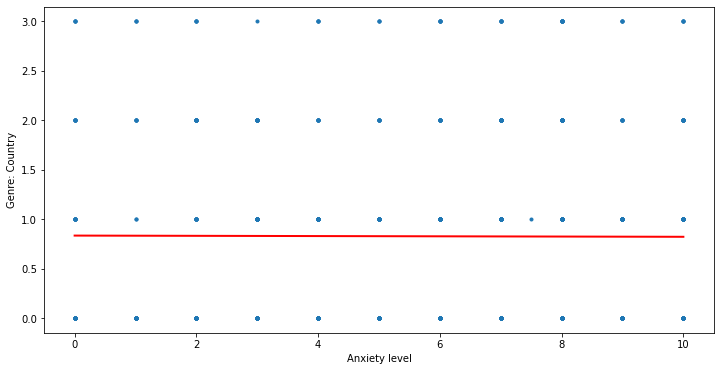

In [25]:
# Plot the model fitted line on the output variable
plt.figure(figsize=(12, 6))
prediction_space = np.linspace(min(X_anxiety), max(X_anxiety)).reshape(-1,1)
plt.scatter(X_anxiety, y_country, marker='.')
plt.plot(prediction_space, model.predict(prediction_space), color = 'red', linewidth = 2)
plt.ylabel('Genre: Country')
plt.xlabel('Anxiety level')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (148, 1) and (50, 1)

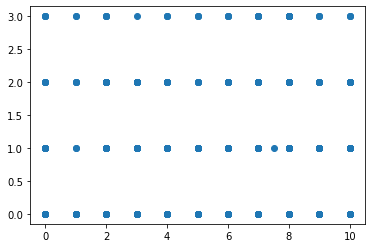

In [28]:
plt.scatter(X_train_1, y_train_1) 
plt.plot(X_test_1, prediction_space) 
plt.show()